En este archivo puedes escribir lo que estimes conveniente. Te recomendamos detallar tu solución y todas las suposiciones que estás considerando. Aquí puedes ejecutar las funciones que definiste en los otros archivos de la carpeta src, medir el tiempo, memoria, etc.

In [1]:
file_path = "farmers-protest-tweets-2021-2-4.json"

# Understanding the data

The provided data is in JSON format, with each line representing a separate JSON object. We can will it into Pandas for easy exploration and analysis.

In [2]:
import pandas as pd

df = pd.read_json(file_path, lines=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117407 entries, 0 to 117406
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   url              117407 non-null  object             
 1   date             117407 non-null  datetime64[ns, UTC]
 2   content          117407 non-null  object             
 3   renderedContent  117407 non-null  object             
 4   id               117407 non-null  int64              
 5   user             117407 non-null  object             
 6   outlinks         117407 non-null  object             
 7   tcooutlinks      117407 non-null  object             
 8   replyCount       117407 non-null  int64              
 9   retweetCount     117407 non-null  int64              
 10  likeCount        117407 non-null  int64              
 11  quoteCount       117407 non-null  int64              
 12  conversationId   117407 non-null  int64              
 13 

In [3]:
# Let us explore the format of the user data, which is a dictionary
# Let us convert the user data into a dataframe
user_df = pd.json_normalize(df['user'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117407 entries, 0 to 117406
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   username          117407 non-null  object
 1   displayname       117407 non-null  object
 2   id                117407 non-null  int64 
 3   description       117407 non-null  object
 4   rawDescription    117407 non-null  object
 5   descriptionUrls   117407 non-null  object
 6   verified          117407 non-null  bool  
 7   created           117407 non-null  object
 8   followersCount    117407 non-null  int64 
 9   friendsCount      117407 non-null  int64 
 10  statusesCount     117407 non-null  int64 
 11  favouritesCount   117407 non-null  int64 
 12  listedCount       117407 non-null  int64 
 13  mediaCount        117407 non-null  int64 
 14  location          117407 non-null  object
 15  protected         117407 non-null  bool  
 16  linkUrl           18946 non-null   obj

In [4]:
# Let us explore the format of the the quotedTweet colunm
# each row is a dictionary, let us create a new dataframe with the quotedTweet column
quoted_df = pd.DataFrame(list(df['quotedTweet'].dropna()))
quoted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41436 entries, 0 to 41435
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   url              41436 non-null  object
 1   date             41436 non-null  object
 2   content          41436 non-null  object
 3   renderedContent  41436 non-null  object
 4   id               41436 non-null  int64 
 5   user             41436 non-null  object
 6   outlinks         41436 non-null  object
 7   tcooutlinks      41436 non-null  object
 8   replyCount       41436 non-null  int64 
 9   retweetCount     41436 non-null  int64 
 10  likeCount        41436 non-null  int64 
 11  quoteCount       41436 non-null  int64 
 12  conversationId   41436 non-null  int64 
 13  lang             41436 non-null  object
 14  source           41436 non-null  object
 15  sourceUrl        41359 non-null  object
 16  sourceLabel      41359 non-null  object
 17  media            22286 non-null

In [5]:
# Let us explore the format of the the mentionedUsers colunm

pd.json_normalize(df['mentionedUsers'].dropna().explode().reset_index(drop=True)).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103403 entries, 0 to 103402
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   username          103403 non-null  object
 1   displayname       103403 non-null  object
 2   id                103403 non-null  int64 
 3   description       0 non-null       object
 4   rawDescription    0 non-null       object
 5   descriptionUrls   0 non-null       object
 6   verified          0 non-null       object
 7   created           0 non-null       object
 8   followersCount    0 non-null       object
 9   friendsCount      0 non-null       object
 10  statusesCount     0 non-null       object
 11  favouritesCount   0 non-null       object
 12  listedCount       0 non-null       object
 13  mediaCount        0 non-null       object
 14  location          0 non-null       object
 15  protected         0 non-null       object
 16  linkUrl           0 non-null       obj

### Important notes

The `quotedTweet` has exactly the same structure as the main tweet, so we have to interate over everything to make sure we are not missing any information. We should also avoid double counting the same tweet, but dropping duplicates with the same id.



## Overview of Challenges

The provided challenges are:

- Challenge 1: identifying the top 10 dates with the most tweets and associating each of those dates with the user (username) who made the most posts on that day.
- Challenge 2: identifying the top 10 most used emojis with their respective count.
- Challenge 3: Find the historical top 10 most influential users (username) based on the count of mentions (@) each one receives.

For all three challenges, the columns `quotedTweet` and `id` are used, allowing us to:

- Ensure all tweets are analyzed (`quotedTweet`).
- Remove duplicates based on tweet `id` (to avoid counting the same tweet multiple times).

### Challenge 1: Top 10 dates with most tweets

For this challenge, we need two columns:
- `date`: The date when the tweet was posted.
- `user`: A dictionary containing the username of the person who posted the most tweets on that day.

### Challenge 2: Top 10 most used emojis

In this challenge, we require the following columns:
- `content`: The tweet text.

### Challenge 3: Most influential users (based on mentions)

For this challenge, we will focus on the `mentionedUsers` column to track how many times each user has been mentioned.


## Tools Used

All three challenges require two main strategies: optimizing for **time** and **memory** usage.

### Time Optimization

To optimize runtime, we will use the **Pandas** library. Pandas is highly efficient for most operations, as it is built on top of **NumPy**, which allows it to vectorize operations. This enables parallel processing and optimizes performance, making it significantly faster than traditional Python loops. However, while Pandas excels in speed, it is not very memory efficient due to the overhead involved in managing **DataFrame** objects.

Since the problems only require a small subset of the data (usually one or two attributes), it is more efficient to load only the necessary columns—one row at a time—rather than loading the entire dataset into memory. This approach also helps reduce memory usage significantly. 

The cell below runs a **timeit** test on a simple function that reads the JSON objects. The result is a runtime of `2.64 s ± 119 ms`, which, as we will see later, is comparable to the runtimes of `q1_time` and `q3_time`. This shows that loading the full dataset into a DataFrame would increase runtime considerably.


In [6]:
def read_json(file_path):
    df = pd.read_json(file_path, lines=True)
    return df

%timeit read_json(file_path)

2.64 s ± 37.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Memory Optimization

To optimize memory usage, we use **pure Python objects** defined in the standard library. This method is more memory-efficient than using Pandas DataFrames, as it avoids the overhead associated with managing DataFrame objects.

Since time efficiency is not a primary concern, we load the data multiple times to minimize memory usage. Specifically, we first load the initial tweets and store only their *ids*. Then, we load the data again, but this time we only retrieve the quoted tweets with different ids. This strategy ensures that we don't keep the entire quoted tweet objects in memory, nor do we load duplicate tweets.


# Benchmarking

## Benchmarking Tools

### Memory Measurement

To measure memory usage over time, we will use the **`memory_profiler`** library. Since running memory measurements within a Jupyter notebook can sometimes lead to interference, we will execute the memory profiler in a separate script (`src/memory_profile.py`) for more accurate results. The memory profiles will be saved to `txt` files, which we will then load here for analysis. To ensure reproducibility, these files are included in the repository.

### Runtime Measurement

For measuring the execution time of our functions, we will use the **`timeit`** module. As part of the standard Python library, `timeit` offers a simple and efficient way to measure the execution time of small code snippets. In this notebook, we will leverage the Jupyter magic command `%%timeit` to measure the runtime of our functions directly in the notebook.


In [7]:
# import all function to benchmark

from q1_time import q1_time
from q1_memory import q1_memory
from q2_time import q2_time
from q2_memory import q2_memory
from q3_time import q3_time
from q3_memory import q3_memory

## Memory Profile

When benchmarking, it is important to repeat the process multiple times to ensure consistent results. We ran the memory profile 10 times for each function. The plots below show the mean and standard deviation of memory usage for each function. Since the runtime can vary across runs, we plot the memory usage corresponding to the smallest runtime out of the 10 executions.

In [8]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt

def plot_memory_usage(memory_usage_list: List[List[float]], color='tab:blue', label='', interval=0.05) -> None:
    """ Plot the average memory usage over time with the standard deviation.

    Parameters
    ----------
    memory_usage_list : List[List[float]]
        A list of lists containing the memory usage of the function at different times.
    color : str, optional
        The color of the plot, by default 'tab:blue'
    label : str, optional
        The label of the plot, by default ''
    interval : float, optional
        The interval between each memory usage measurement, by default 0.05
    """

    # resample the data in the lists to have the same length
    min_length = min([len(l) for l in memory_usage_list])
    memory_usage_list = [l[:min_length] for l in memory_usage_list]
    # compute the average memory usage
    memory_usage_list = np.array(memory_usage_list)
    avg = np.mean(memory_usage_list, axis=0)
    # compute the standard deviation
    std = np.std(memory_usage_list, axis=0)

    # convert from MiB to MB
    avg = avg * 1.04858
    std = std * 1.04858

    # create time array
    time = np.arange(0, len(avg))
    time = time * interval

    # plot the average memory usage
    plt.plot(time, avg, label="average", color=color)
    # plot the standard deviation
    plt.fill_between(time, avg - std, avg + std, alpha=0.3, color=color)
    plt.xlabel("Time (s)")
    plt.ylabel("Memory usage (MB)")
    plt.title(f"{label} average memory usage over time with n={len(memory_usage_list)}.\n"
              f"Memory peak: {np.max(avg):.2f} MB")
    
    plt.ticklabel_format(useOffset=False)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

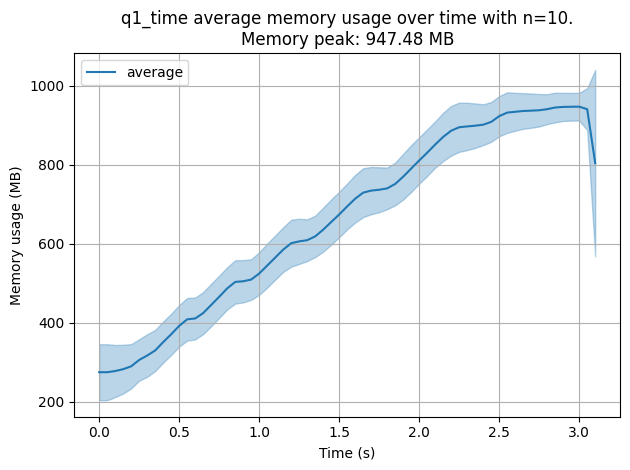

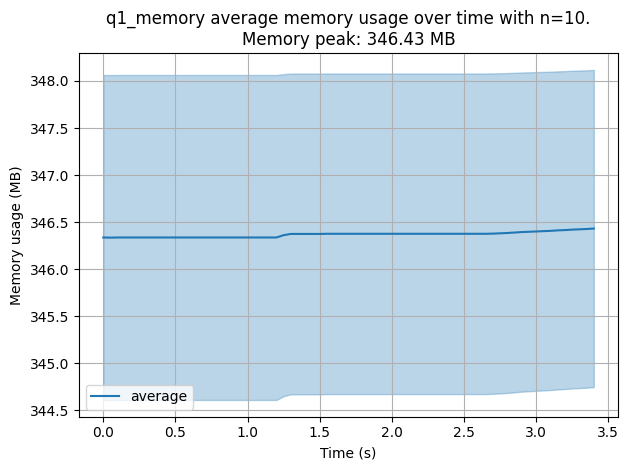

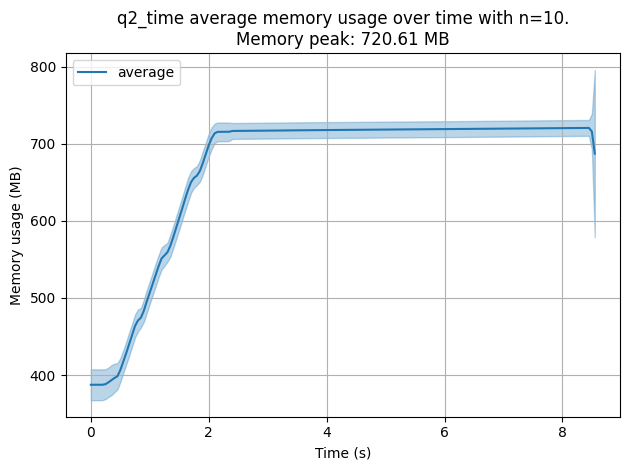

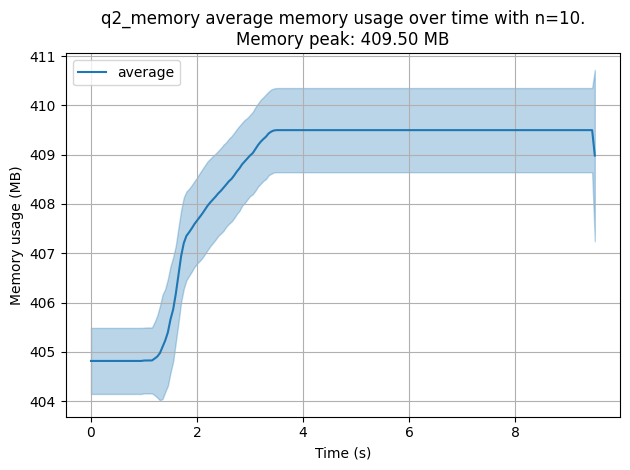

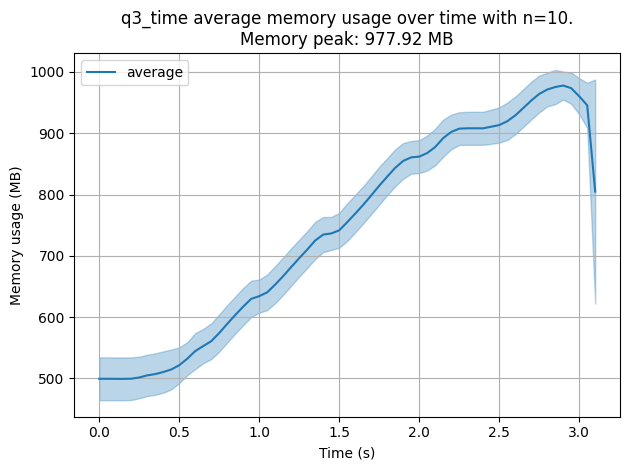

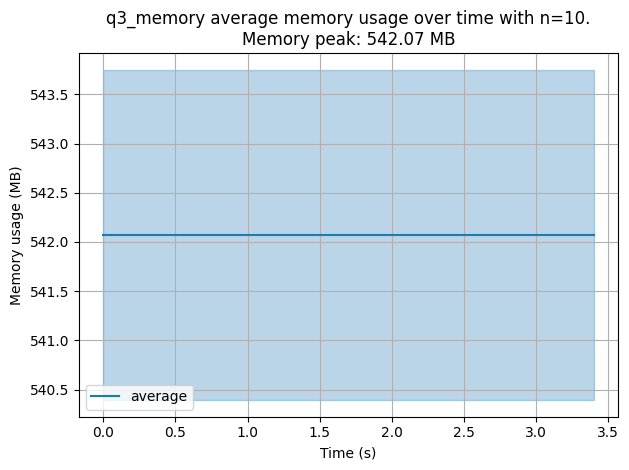

In [9]:
from collections import defaultdict

functions = {
    'q1_time': q1_time,
    'q1_memory': q1_memory,
    'q2_time': q2_time,
    'q2_memory': q2_memory,
    'q3_time': q3_time,
    'q3_memory': q3_memory
}

# change this if you changed the path, file name, or interval in `memory_profile.py`
mprof_path = '../benchmark/'
mprof_postfix = '_mprof.txt'
interval = 0.05

# As in each run the times are different, each time the memory profiler run the size of the 
# memory usage list is different. So, the saved files contain one list per line.
# We will load each list and append to another list
memory_usage_lists = defaultdict(list)
for func_name in functions:
    memory_usage_lists[func_name] = []
    with open(mprof_path + func_name + mprof_postfix, 'r') as f:
        for line in f:
            memory_usage_lists[func_name].append([float(x) for x in line.strip().split(',')])

# plot the memory usage
for func_name in memory_usage_lists:
    plot_memory_usage(memory_usage_lists[func_name], label=func_name, interval=interval)


#### Memory Usage Analysis

As expected, the functions optimized for memory usage consume less memory than their respective functions optimized for runtime. 

For `q1_memory` and `q3_memory`, the memory usage remains approximately constant. This is because the memory usage mainly depends on the data loaded, and the counting operations do not require a lot of additional memory allocations.

For `q2_memory`, the memory usage starts off constant, then increases slightly mid-run before stabilizing again. This increase can be attributed to the command `texts = list(content.values())`, which creates a new list from the loaded data, thereby increasing memory usage.

In contrast, for the time-optimized functions, memory usage increases steadily throughout the run. This is because the operations constantly create new **Pandas** objects, leading to continuous memory consumption.


## Runtime Profile

The cells below show the runtime for each function, measured using the **`timeit`** module. Note that these values may vary if the notebook is re-run.

1. `q1_time`: 2.47 s ± 46.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2. `q1_memory`: 3.65 s ± 40.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3. `q2_time`: 8.47 s ± 57.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4. `q2_memory`: 9.81 s ± 138 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5. `q3_time`: 2.89 s ± 46.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6. `q3_memory`: 3.67 s ± 20 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

As expected, the functions optimized for runtime perform faster than their memory-optimized counterparts. The difference is relatively small because the dataset is fairly small, and the operations are not computationally intensive (the **`Counter`** Python object is highly efficient). However, for larger datasets or more complex operations, the runtime difference would become more significant, as **Pandas** leverages vectorized operations for faster processing.

In [10]:
%timeit q1_time(file_path)

2.47 s ± 46.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit q1_memory(file_path)

3.65 s ± 40.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit q2_time(file_path)

8.47 s ± 57.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit q2_memory(file_path)

9.81 s ± 138 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%timeit q3_time(file_path)

2.89 s ± 46.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit q3_memory(file_path)

3.67 s ± 20 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
